<a href="https://colab.research.google.com/github/maticvl/dataHacker/blob/master/OPENCV_PROJECTS/_014_Feature_Matching_methods_comparison_in_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

     |████████████████████████████████| 25.0MB 1.6MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6MB 167kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from google.colab.patches import cv2_imshow

In [3]:
!wget https://raw.githubusercontent.com/maticvl/dataHacker/master/DATA/Picture4.jpg -O "Picture4.jpg" 
!wget https://raw.githubusercontent.com/maticvl/dataHacker/master/DATA/Picture5.jpg -O "Picture5.jpg" 

--2021-01-14 00:51:02--  https://raw.githubusercontent.com/maticvl/dataHacker/master/DATA/Picture4.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116685 (114K) [image/jpeg]
Saving to: ‘Picture4.jpg’

Picture4.jpg        100%[===================>] 113.95K  --.-KB/s    in 0.02s   

2021-01-14 00:51:02 (6.90 MB/s) - ‘Picture4.jpg’ saved [116685/116685]

--2021-01-14 00:51:02--  https://raw.githubusercontent.com/maticvl/dataHacker/master/DATA/Picture5.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118574 (116K) [image/jpeg]
Saving to:

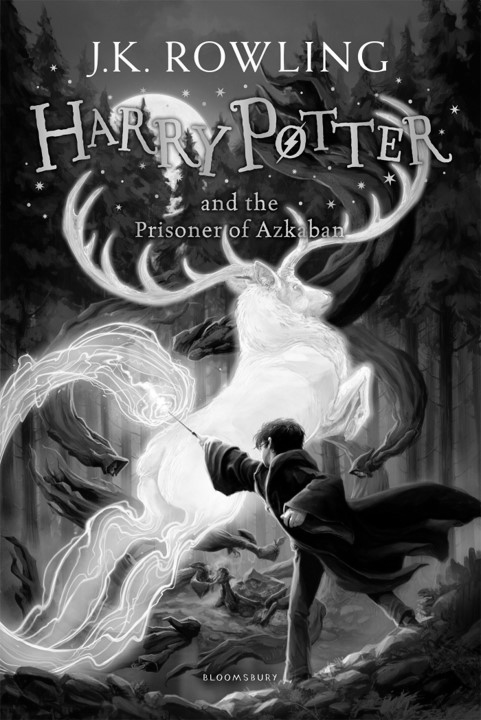

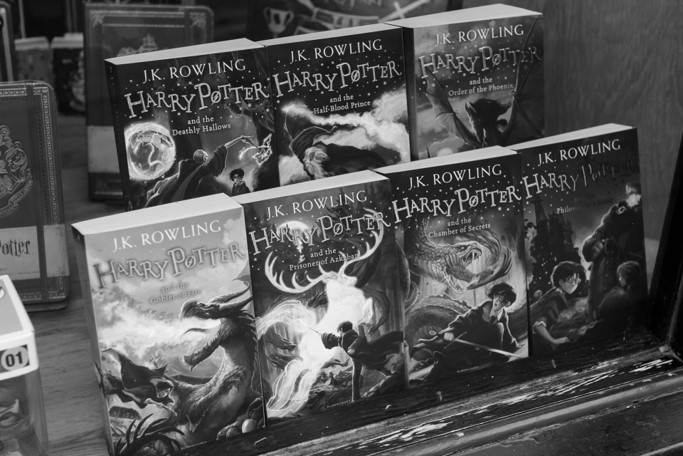

In [5]:
img1 = cv2.imread("Picture4.jpg")
img2 = cv2.imread("Picture5.jpg")

img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

cv2_imshow(img1_gray)
cv2_imshow(img2_gray)

In [6]:
# Create our ORB detector and detect keypoints and descriptors
orb = cv2.ORB_create()

In [7]:
# Find the key points and descriptors with ORB
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

In [8]:
# Create a BFMatcher object.
# It will find all of the matching keypoints on two images
bf = cv2.BFMatcher_create(cv2.NORM_HAMMING,crossCheck=True)

In [9]:
matches = bf.match(descriptors1, descriptors2)

In [10]:
single_match = matches[0]
single_match.distance

78.0

In [11]:
matches = sorted(matches,key=lambda x:x.distance)

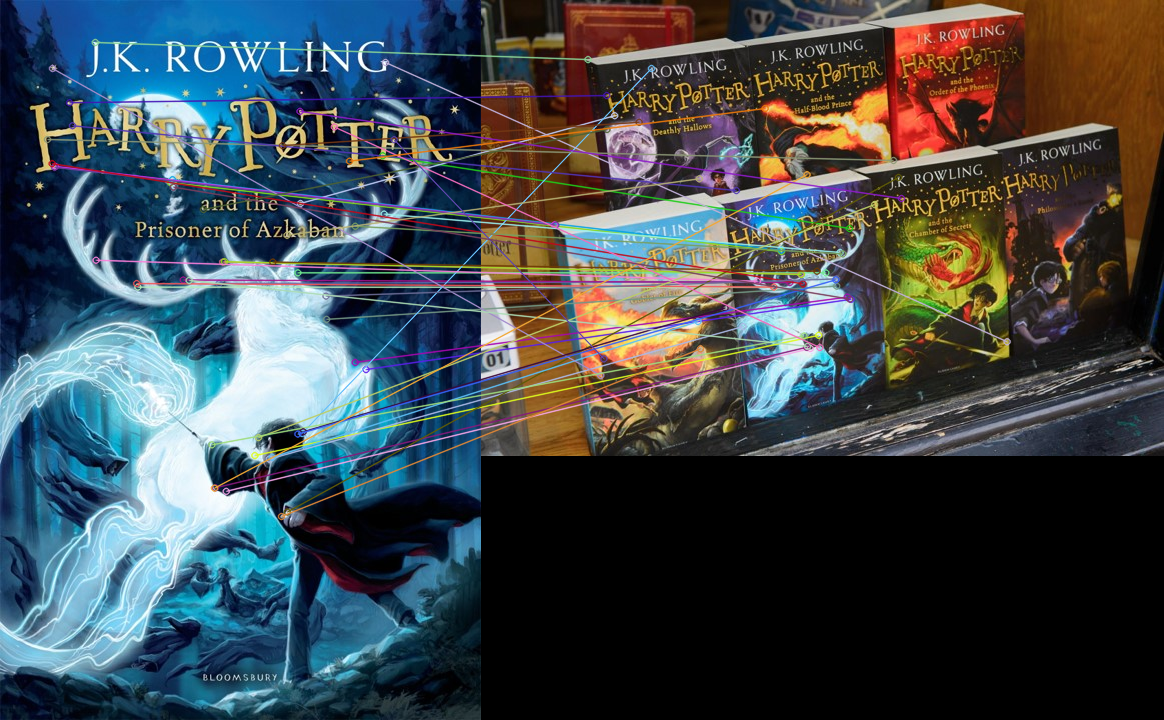

In [12]:
orb_matches =cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:50], None, flags=2)
cv2_imshow(orb_matches)

In [13]:
# Create our ORB detector and detect keypoints and descriptors
sift = cv2.xfeatures2d.SIFT_create()

In [14]:
# Find the key points and descriptors with ORB
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

In [15]:
bf = cv2.BFMatcher()

In [16]:
matches = bf.knnMatch (descriptors1, descriptors2,k=2)

In [17]:
descriptors1

array([[ 19.,  17.,  32., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  64.,   3.,   5.],
       [ 15.,   0.,   0., ...,  22.,   0.,   2.],
       ...,
       [ 89.,  33.,   0., ...,   0.,  14.,  16.],
       [ 17.,   9.,   0., ...,   0.,   0.,   0.],
       [  1.,  17., 117., ...,   0.,   0.,   0.]], dtype=float32)

In [18]:
descriptors2

array([[ 58.,   2.,   2., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   1.,   2.],
       [  3.,   2.,   3., ...,   0.,   0.,   2.],
       ...,
       [ 72.,   6.,   2., ...,   2.,   0.,   0.],
       [  0.,   0.,   0., ..., 116.,   4.,   6.],
       [  0.,   0.,   0., ...,  15.,   0.,   0.]], dtype=float32)

In [19]:
matches

[[<DMatch 0x7f2c535a6610>, <DMatch 0x7f2c5356e3b0>],
 [<DMatch 0x7f2c5356e390>, <DMatch 0x7f2c5356e4b0>],
 [<DMatch 0x7f2c5356e550>, <DMatch 0x7f2c5356e4f0>],
 [<DMatch 0x7f2c5356e470>, <DMatch 0x7f2c5356e450>],
 [<DMatch 0x7f2c5356e590>, <DMatch 0x7f2c5356e5b0>],
 [<DMatch 0x7f2c5356e5d0>, <DMatch 0x7f2c5356e5f0>],
 [<DMatch 0x7f2c5356e610>, <DMatch 0x7f2c5356e630>],
 [<DMatch 0x7f2c5356e650>, <DMatch 0x7f2c5356e670>],
 [<DMatch 0x7f2c5356e690>, <DMatch 0x7f2c5356e6b0>],
 [<DMatch 0x7f2c5356e6d0>, <DMatch 0x7f2c5356e6f0>],
 [<DMatch 0x7f2c5356e710>, <DMatch 0x7f2c5356e730>],
 [<DMatch 0x7f2c5356e750>, <DMatch 0x7f2c5356e770>],
 [<DMatch 0x7f2c5356e790>, <DMatch 0x7f2c5356e7b0>],
 [<DMatch 0x7f2c5356e7d0>, <DMatch 0x7f2c5356e7f0>],
 [<DMatch 0x7f2c5356e810>, <DMatch 0x7f2c5356e830>],
 [<DMatch 0x7f2c5356e850>, <DMatch 0x7f2c5356e870>],
 [<DMatch 0x7f2c5356e890>, <DMatch 0x7f2c5356e8b0>],
 [<DMatch 0x7f2c5356e8d0>, <DMatch 0x7f2c5356e8f0>],
 [<DMatch 0x7f2c5356e910>, <DMatch 0x7f2c5356e

In [72]:
AA1 = matches[131][0]
AA1.distance

163.8322296142578

In [73]:
AA2 = matches[131][1]
AA2.distance

291.624755859375

In [74]:
BB1 = matches[1][0]
BB1.distance

287.2438049316406

In [75]:
BB2 = matches[1][1]
BB2.distance

301.8923645019531

In [20]:
good_matches = []

for m1, m2 in matches:
  if m1.distance < 0.6*m2.distance:
    good_matches.append([m1])

In [21]:
good_matches

[[<DMatch 0x7f2c535685d0>],
 [<DMatch 0x7f2c53568810>],
 [<DMatch 0x7f2c51b26b50>],
 [<DMatch 0x7f2c51b26d50>],
 [<DMatch 0x7f2c51b26f50>],
 [<DMatch 0x7f2c51b26f90>],
 [<DMatch 0x7f2c51b28390>],
 [<DMatch 0x7f2c51b283d0>],
 [<DMatch 0x7f2c51b285d0>],
 [<DMatch 0x7f2c51b28650>],
 [<DMatch 0x7f2c51b28750>],
 [<DMatch 0x7f2c51b28a90>],
 [<DMatch 0x7f2c51b28b10>],
 [<DMatch 0x7f2c51b2a8d0>],
 [<DMatch 0x7f2c51b2a910>],
 [<DMatch 0x7f2c51b2aad0>],
 [<DMatch 0x7f2c51b2ab90>],
 [<DMatch 0x7f2c51b2c710>],
 [<DMatch 0x7f2c51b2c8d0>],
 [<DMatch 0x7f2c51b2ccd0>],
 [<DMatch 0x7f2c51b2f410>],
 [<DMatch 0x7f2c51b2f5d0>],
 [<DMatch 0x7f2c51b2f610>],
 [<DMatch 0x7f2c51b2f650>],
 [<DMatch 0x7f2c51b31250>],
 [<DMatch 0x7f2c51b31290>],
 [<DMatch 0x7f2c51b313d0>],
 [<DMatch 0x7f2c51b31410>],
 [<DMatch 0x7f2c51b315d0>],
 [<DMatch 0x7f2c51b31910>],
 [<DMatch 0x7f2c51b31990>],
 [<DMatch 0x7f2c51b33190>],
 [<DMatch 0x7f2c51b33210>],
 [<DMatch 0x7f2c51b33390>],
 [<DMatch 0x7f2c51b33590>],
 [<DMatch 0x7f2c51b3

In [66]:
AA1 = matches[131][0]
AA1.distance

163.8322296142578

In [67]:
AA2 = matches[131][1]
AA2.distance

291.624755859375

In [68]:
BB1 = matches[1][0]
BB1.distance

287.2438049316406

In [69]:
BB2 = matches[1][1]
BB2.distance

301.8923645019531

In [22]:
len(matches)

2342

In [23]:
len(good_matches)

116

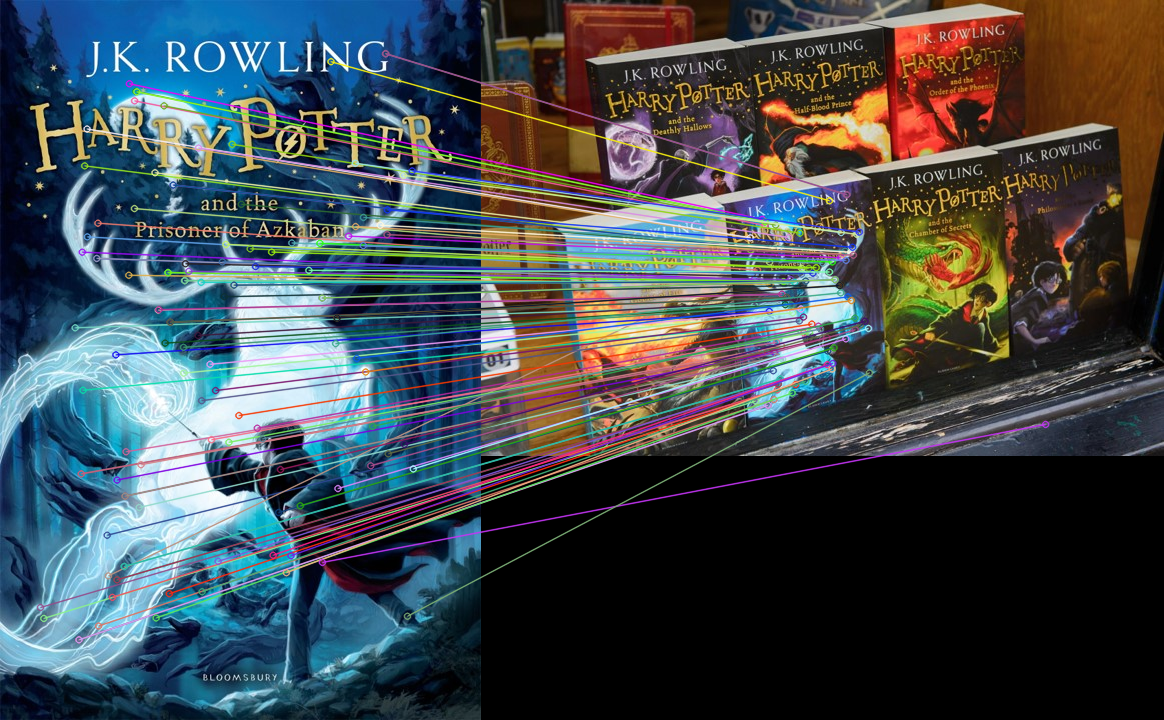

In [24]:
SIFT_matches =cv2.drawMatchesKnn(img1, keypoints1, img2, keypoints2, good_matches, None, flags=2)
cv2_imshow(SIFT_matches)

In [25]:
sift = cv2.xfeatures2d.SIFT_create()

In [26]:
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

In [27]:
FLAN_INDEX_KDTREE = 0
index_params = dict (algorithm = FLAN_INDEX_KDTREE, trees=5)
search_params = dict (checks=50)

In [28]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [40]:
good_matches = []

for m1, m2 in matches:
  if m1.distance < 0.6 * m2.distance:
    good_matches.append([m1])

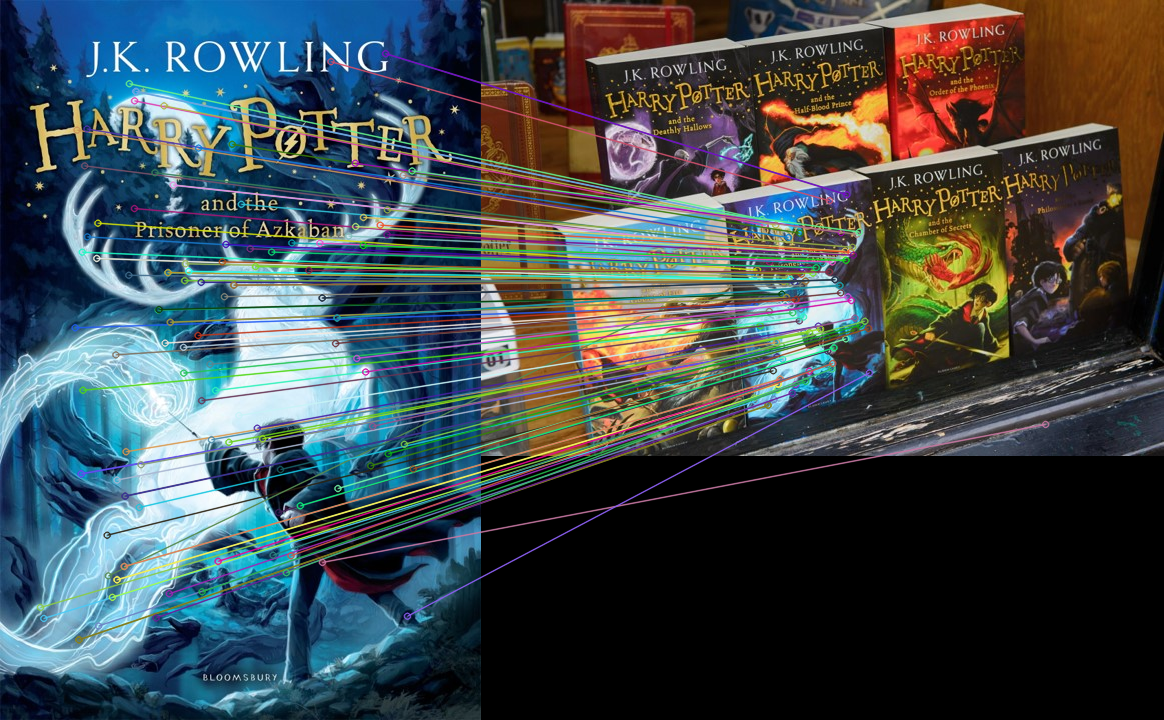

In [41]:
flann_matches =cv2.drawMatchesKnn(img1, keypoints1, img2, keypoints2, good_matches, None, flags=2)
cv2_imshow(flann_matches)

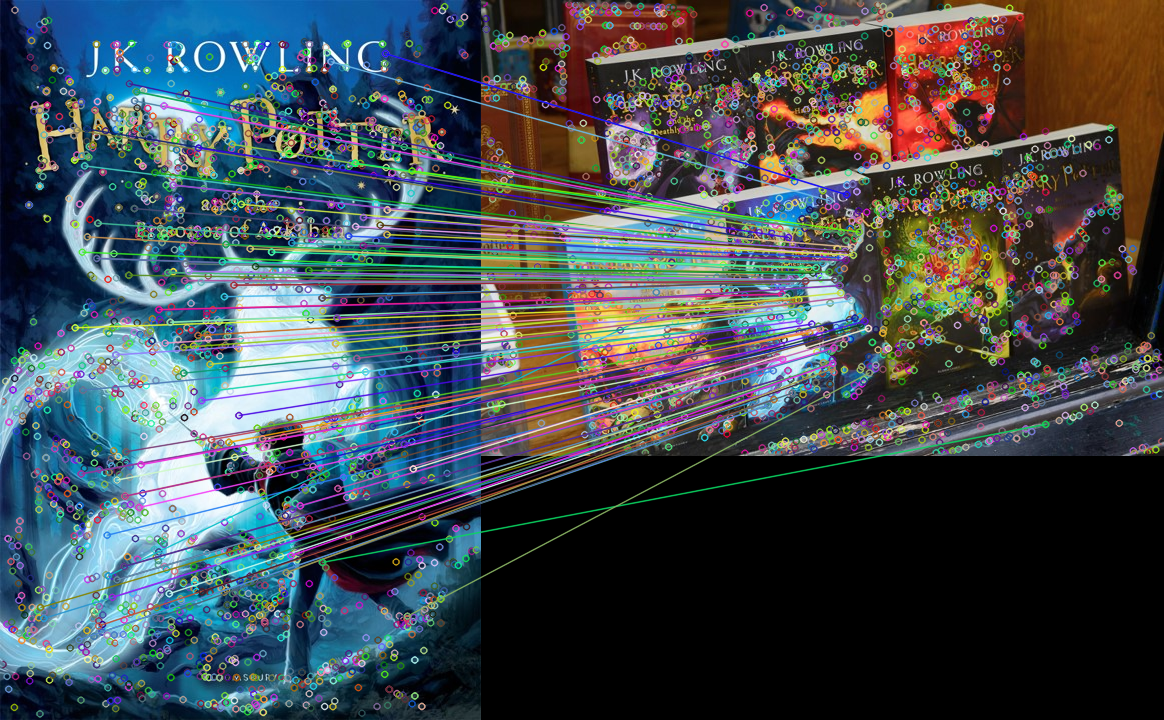

In [42]:
flann_matches =cv2.drawMatchesKnn(img1, keypoints1, img2, keypoints2, good_matches, None, flags=0)
cv2_imshow(flann_matches)

In [43]:
sift = cv2.xfeatures2d.SIFT_create()

keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

FLAN_INDEX_KDTREE = 0
index_params = dict (algorithm = FLAN_INDEX_KDTREE, trees=5)
search_params = dict (checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch (descriptors1, descriptors2, k=2)

In [44]:
matchesMask = [[0,0] for i in range(len(matches))]

In [45]:
matchesMask

[[0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 

In [46]:
for i,(m1, m2) in enumerate (matches):
  if m1.distance < 0.5 * m2.distance:
    matchesMask[i] = [1,0]

In [47]:
draw_params = dict (matchColor = (0,0,255), singlePointColor = (0,255,0), matchesMask = matchesMask, flags=2 )

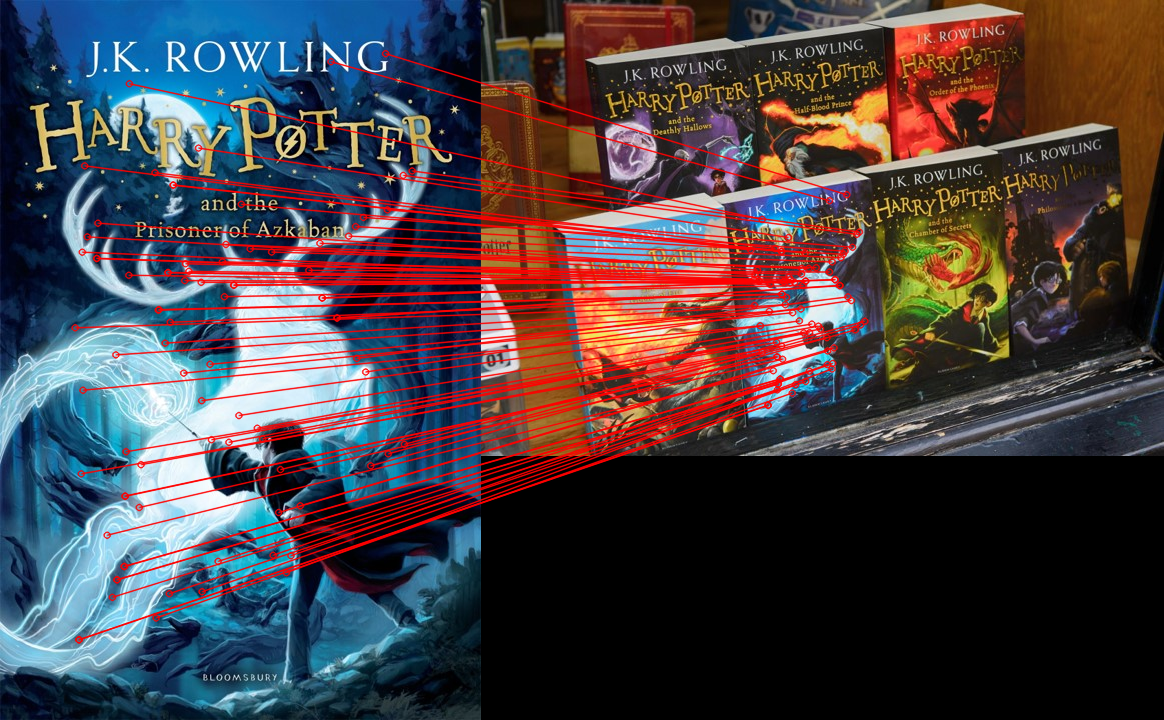

In [48]:
flann_matches =cv2.drawMatchesKnn(img1, keypoints1, img2, keypoints2, matches, None,**draw_params)
cv2_imshow(flann_matches)